In [2]:
%matplotlib inline
from __future__ import division
import numpy as np
import pandas as pd
from numpy.linalg import inv,pinv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lns
from IPython.display import display, HTML

df = pd.read_excel ('Industry_Portfolios.xlsx')
Return=df.set_index('Date')
Return.columns

Index(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth',
       'Utils', 'Other'],
      dtype='object')

#### Calculate the vector of mean returns and the covariance matrix of returns for the ten industry portfolios

In [114]:

mean_ret = pd.DataFrame({'Mean Returns':Return.mean()})
cov = Return.cov()


In [115]:
# convert mean return and covariance matrix into numpy matrix

R = np.matrix(Return.mean())
R = np.matrix(R.T)
V = np.matrix(Return.cov())
SD = np.sqrt(np.diag(V))
display(R)
display(V)

matrix([[0.90283333],
        [0.73333333],
        [1.01283333],
        [1.23116667],
        [0.76625   ],
        [0.88141667],
        [0.91633333],
        [0.78383333],
        [0.90716667],
        [0.48908333]])

matrix([[11.19342216, 18.44966611, 14.10490703, 10.5313412 , 12.92294937,
         11.96807831, 10.17083232,  9.95311174,  7.86665347, 14.4384085 ],
        [18.44966611, 69.92057703, 39.1780972 , 27.0197944 , 35.4666521 ,
         27.49054314, 27.44473081, 16.82400308, 12.74613641, 39.36198711],
        [14.10490703, 39.1780972 , 28.19897006, 23.14537986, 24.61873929,
         19.55014973, 17.62286678, 13.59644703, 11.4406123 , 26.31342279],
        [10.5313412 , 27.0197944 , 23.14537986, 36.98493308, 19.26727584,
         15.36681682, 11.29780011,  9.63032658, 14.02716804, 18.32046915],
        [12.92294937, 35.4666521 , 24.61873929, 19.26727584, 28.95722027,
         18.70827342, 17.83711471, 13.25406408, 10.30418676, 23.85547048],
        [11.96807831, 27.49054314, 19.55014973, 15.36681682, 18.70827342,
         19.78722739, 14.16935566, 11.50659873, 10.99159564, 19.61083576],
        [10.17083232, 27.44473081, 17.62286678, 11.29780011, 17.83711471,
         14.16935566, 16.7590839

#### Create a table showing the mean returns and standard deviation of returns for the ten industry portfolios

In [116]:
display(mean_ret.T)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Mean Returns,0.902833,0.733333,1.012833,1.231167,0.76625,0.881417,0.916333,0.783833,0.907167,0.489083


In [117]:
sd=pd.DataFrame(SD,index=[Return.columns])
sd.columns=['standard deviation']
display(sd.T)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
standard deviation,3.345657,8.361852,5.31027,6.081524,5.381191,4.448284,4.093786,3.787172,3.701763,5.582452


#### Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios

<ipython-input-184-4046658d2c1d>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


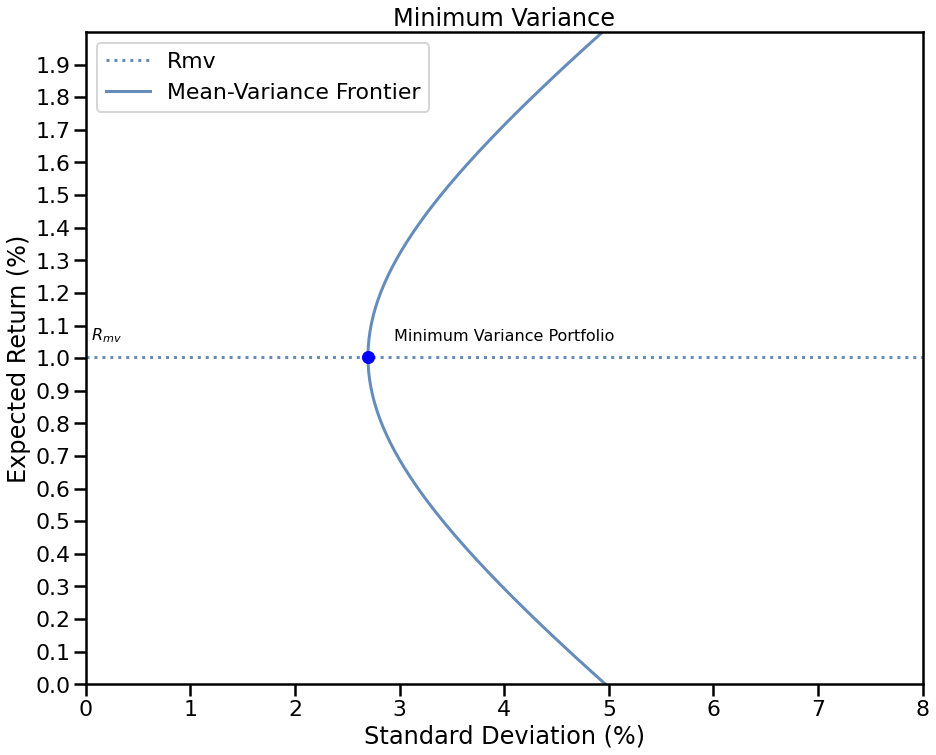

In [184]:
# n x 1 vector of 1
e = np.ones((len(R),1))
# Variable for Efficient frontier
delta = e.T*pinv(V)*e # eV-1e
alpha = R.T*pinv(V)*e # R'V-1e
zeta = R.T*pinv(V)*R # R'V-1R
D = zeta*delta-alpha**2 # denominator
# Return evenly spaced values within a given interval
mu = np.arange(-max(R),max(R)*5,max(R)/100); 

# Plot Efficient Frontier
minvar = ((delta*mu**2)-2*alpha*mu+zeta)/D; # Calculate variance of return for frontier portfolio
minstd = np.sqrt(minvar)[0]; # min. std deviation
minstd = np.squeeze(np.asarray(minstd)) 
# Mean and Variance of Minimum Variance Portfolio
# Mean and Variance of Minimum Variance Portfolio
mu_g = alpha/delta
var_g = 1/delta
std_g = np.sqrt(var_g)

# Minimum Variance Portfolio Weights
w_g = (pinv(V)*e)/delta
 

# Seaborn aesthetics settings
sns.set_context("poster")
plt.figure(figsize=(15,12))
# Axis settings
axes = plt.gca()
axes.set_xlim([0,8])
axes.set_ylim([0,2])
ax = plt.axes()



# Plot minimum frontier portfolio 
ax.axhline(mu_g, color='xkcd:faded blue', linestyle=':')
plt.plot(minstd,mu,'xkcd:faded blue',std_g,mu_g,'bo') 
plt.title('Minimum Variance')
plt.yticks(np.arange(0, 2, 0.1))
plt.ylabel('Expected Return (%)')
plt.xlabel('Standard Deviation (%)')
plt.text(0.05,0.05+mu_g,r'$R_{mv}$',fontsize=16);
plt.text(0.25+std_g, 0.05+mu_g,'Minimum Variance Portfolio',fontsize=16);

# Putting arrow & Legend
axes.legend(['Rmv','Mean-Variance Frontier'])


####  Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.

> The minimum-variance frontier can tell the investor about the risky portfolio construction which has the lowest possible risk that they can get for certain amount of expected return 

#### Plot the efficient frontier (with the riskless asset) on the same plot as the minimum-variance frontier

<ipython-input-186-c0af03a60d9b>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


<Figure size 1080x864 with 0 Axes>

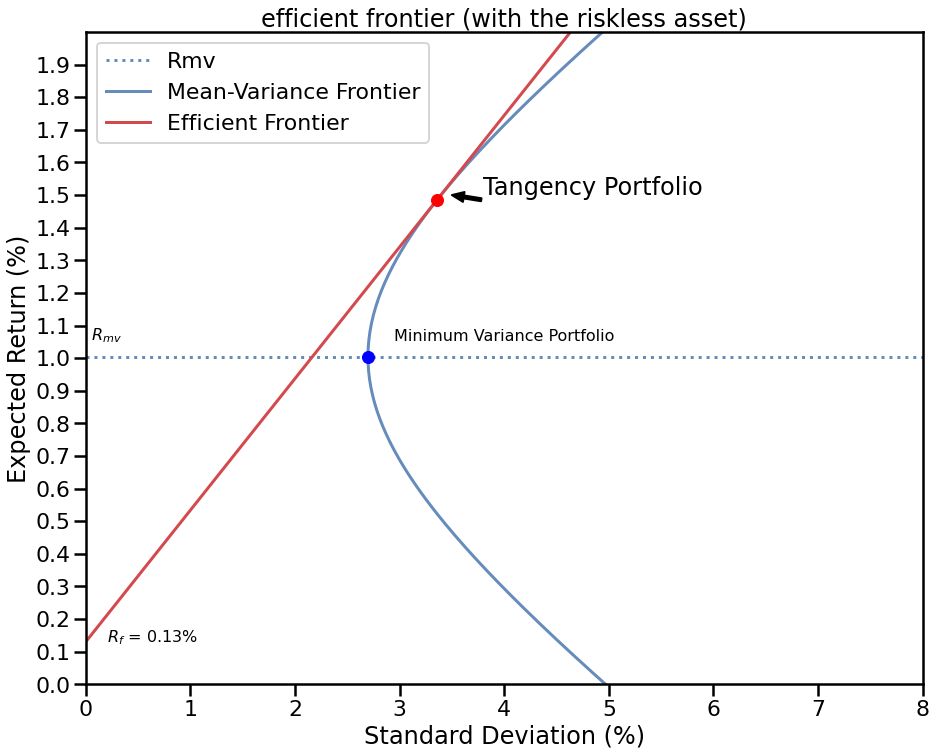

In [186]:
#Plot the efficient frontier (with the riskless asset) on the same plot as the minimum-variance frontier
rf = 0.13 # risk-free rate
# Expected Return of Tangency Portfolio/ Risk Premium for tangency portfolio
mu_tan = (alpha*rf-zeta)/(delta*rf-alpha);
 
# Variance and Standard Deviation of Tangency Portfolio
vartan = (zeta-2*rf*alpha + (rf**2*delta))/((alpha-delta*rf)**2);
stdtan = np.sqrt(vartan);

# Weights for Tangency Portfolio
w_tan = (pinv(V)*(R - rf*e))/(alpha-delta*rf) 

# Tangency Line
m_tan = mu[mu >= rf]; 
minvar_rf = (m_tan-rf)**2/(zeta-2*rf*alpha+delta*rf**2);
minstd_rf = np.sqrt(minvar_rf);
minstd_rf = np.squeeze(np.asarray(minstd_rf))


plt.figure(figsize=(15,12))

# Seaborn aesthetics settings
sns.set_context("poster")
plt.figure(figsize=(15,12))
# Axis settings
axes = plt.gca()
axes.set_xlim([0,8])
axes.set_ylim([0,2])
ax = plt.axes()

ax.axhline(mu_g, color='xkcd:faded blue', linestyle=':')
plt.plot(minstd,mu,'xkcd:faded blue',minstd_rf,m_tan,'xkcd:faded red',std_g,mu_g,'bo',stdtan,mu_tan,'ro') 
plt.title('efficient frontier (with the riskless asset)')
plt.yticks(np.arange(0, 2, 0.1))
plt.ylabel('Expected Return (%)')
plt.xlabel('Standard Deviation (%)')
plt.text(0.05,0.05+mu_g,r'$R_{mv}$',fontsize=16);
plt.text(0.2,rf,r'$R_{f}$' ' = 0.13%',fontsize=16);
plt.text(0.25+std_g, 0.05+mu_g,'Minimum Variance Portfolio',fontsize=16);

# Putting arrow & Legend
axes.annotate('Tangency Portfolio',xy=(3.5,1.5), xytext=(3.8, 1.5), arrowprops=dict(facecolor='xkcd:black',width=3,headwidth=10))
axes.legend(['Rmv','Mean-Variance Frontier', 'Efficient Frontier'])
plt.show()

#### Briefly explain the economic significance and relevance of the efficient frontier to an investor.

> Not all portfolio on the the minimum-variance frontier is efficient to a investor, only the upper half (efficient frontier) which provide higher expected return at the same level of risk is making same to a investor. Efficient frontier is providing investor the best risky portfolio choice among all risky feasiable portfolio-highest return on certain risk or lowset risk on certain expected return 

#### Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.

In [157]:
# Print out weights of the 10 assets from Tangency Portfolio
w_tan = w_tan.T*100
opt_weights = pd.DataFrame(w_tan,columns=Return.columns,index=["Weights (%)"])

display(opt_weights)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Weights (%),5.679722e+33,-2.140726e+33,7.141051e+33,1.040872e+33,-3.634382e+33,-9.546326e+32,9.916468e+33,7.557020e+32,1.326433e+33,-9.130508e+33


In [177]:
Shape_Ratio=(mu_tan-0.13)/stdtan
Shape_Ratio

matrix([[0.4035656]])

#### Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

> The tangency portfolio has the highest sharpe ratio out of all risky portfolios(with riskless asset portfolio) 